# Visualization Techniques (Projections)

## Venustiano Soancatl Aguilar
### Center for Information Technology
### University of Groningen, the Netherlands

### Projections, given a table of $m$ rows and $n$ columns,
- a row reprents an $n-dimensional$ point,
- a row can be represented/mapped as a $2D$ point
- point-to-point distance (in $2D$) shows similarity of table rows (in $nD$)
- coloring points by one attribute can show groups

Principal component analysis (PCA)
1. compute $n$ eigenvectors $e_i$ and eigenvalues $w_i$ of the $m$ table rows
2. select the two eigenvectors $e_i$ for the two largest eigenvalues $w_i$
3. project the $nD$ points on a $2D$ plane spanned by the two largest eigenvectors

pro’s: simple to compute, many tools support this (linear) method

con’s: 2D distances may not accurately reflect $nD$ distances

### The data

In [1]:
import pandas as pd
# Data
tableRes = pd.read_csv('data/results.txt',sep=' ')
tableRes

,iSubj,trial,Age,Decade,medLrms51,medTI51,medK,meanK,medSpeed,medTIms51,medLcovD51,medLsd51,medLcov51,medLrmslD51,medLsdD51
1,1,1,76,7,0.189493,0.589529,207.800939,333.861515,0.488721,0.806345,0.744766,0.020602,0.108687,1.259172,0.129068
2,1,2,76,7,0.204152,0.697338,223.294322,319.601546,0.518278,0.775451,0.506944,0.016446,0.078140,1.263366,0.105902
3,1,3,76,7,0.217347,0.786131,136.400753,272.460861,0.584193,0.511902,0.706127,0.047372,0.236467,0.782796,0.133917
4,1,4,76,7,0.169569,1.020695,162.034626,289.927862,0.590151,0.416398,0.701803,0.039017,0.265361,0.487570,0.108637
5,1,5,76,7,0.170786,0.769747,141.767674,300.625818,0.551706,0.550029,0.753161,0.036798,0.235907,0.646194,0.119610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,40,6,58,5,0.304933,0.715350,263.249490,393.654382,0.419596,0.989819,0.248116,0.009786,0.031676,2.273710,0.079016
397,40,7,58,5,0.298630,0.758093,285.346624,436.866203,0.364656,1.154292,0.162838,0.005467,0.017858,2.618494,0.050360
398,40,8,58,5,0.295032,0.715015,292.177991,422.242295,0.398149,1.077907,0.266188,0.009360,0.031146,2.475323,0.079460
399,40,9,58,5,0.310277,0.710607,255.888346,392.841818,0.413573,1.023273,0.242811,0.009074,0.028856,2.338997,0.075648


### Selecting columns to normalize

In [2]:
cols_to_norm = tableRes.columns[4:15]
cols_to_norm

Index(['medLrms51', 'medTI51', 'medK', 'meanK', 'medSpeed', 'medTIms51',
       'medLcovD51', 'medLsd51', 'medLcov51', 'medLrmslD51', 'medLsdD51'],
      dtype='object')

### Normalizing the data

In [3]:
tableRes[cols_to_norm] = tableRes[cols_to_norm].transform(lambda value: (value - value.mean()) / value.std())
tableRes.head()

,iSubj,trial,Age,Decade,medLrms51,medTI51,medK,meanK,medSpeed,medTIms51,medLcovD51,medLsd51,medLcov51,medLrmslD51,medLsdD51
1,1,1,76,7,-0.406276,-1.179195,-0.053610,0.024586,-0.206204,0.095150,0.332978,-0.194534,-0.178508,0.045147,0.614619
2,1,2,76,7,-0.168225,-0.344193,0.228271,-0.226344,0.155747,-0.062731,-0.389216,-0.465559,-0.544866,0.054335,-0.174366
3,1,3,76,7,0.046049,0.343531,-1.352643,-1.055870,0.962942,-1.409570,0.215643,1.551026,1.353981,-0.998491,0.779784
4,1,4,76,7,-0.729817,2.160290,-0.886268,-0.748506,1.035904,-1.897633,0.202514,1.006211,1.700509,-1.645271,-0.081213
5,1,5,76,7,-0.710069,0.216632,-1.254999,-0.560256,0.565108,-1.214724,0.358471,0.861507,1.347267,-1.297759,0.292489


### Using `R` for PCA

In [4]:
# activate R magic
%load_ext rpy2.ipython

/opt/conda/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [5]:
%%R
# r imports …
library(ggplot2)
library(data.table)

### `prcomp`

In [6]:
%%R -i tableRes
tpca <- prcomp(tableRes[,5:15])
#print(str(balance.pca))
tpca

Standard deviations (1, .., p=11):
 [1] 2.41173960 1.71307470 0.98895667 0.91062388 0.37032009 0.35355737
 [7] 0.26429141 0.25548704 0.15100026 0.12298269 0.08016767

Rotation (n x k) = (11 x 11):
                    PC1         PC2         PC3         PC4         PC5
medLrms51    0.05971084 -0.53757150 -0.31886975  0.01290679 -0.22309384
medTI51      0.26162265 -0.19597664 -0.03471394 -0.73464487  0.34953967
medK        -0.36843362  0.19195554  0.02969850 -0.26195206 -0.09271083
meanK       -0.35584700  0.15390292 -0.24456723 -0.37430522 -0.17410174
medSpeed     0.36050703 -0.15369588  0.28480403  0.26293426 -0.17036643
medTIms51   -0.39049317  0.12406172 -0.16758189  0.08319465  0.00148884
medLcovD51   0.10189172  0.54217342 -0.10147216  0.11932485 -0.08720354
medLsd51     0.37458176  0.02188806 -0.30760090 -0.21941535 -0.30778866
medLcov51    0.32234471  0.32630834 -0.07510445 -0.15663402 -0.57921111
medLrmslD51 -0.26605790 -0.36743670 -0.37442296  0.15458067 -0.32794638
medLsdD51  

### Plotting PCA
https://cran.r-project.org/web/packages/ggfortify/vignettes/plot_pca.html

[ggfortify](http://www.sthda.com/english/wiki/ggfortify-extension-to-ggplot2-to-handle-some-popular-packages-r-software-and-data-visualization)

In [7]:
%%R
install.packages("ggfortify",repos = "http://cran.us.r-project.org")
# Add this package to your docker file to have it permanently

R[write to console]: trying URL 'http://cran.us.r-project.org/src/contrib/ggfortify_0.4.11.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1952401 bytes (1.9 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to

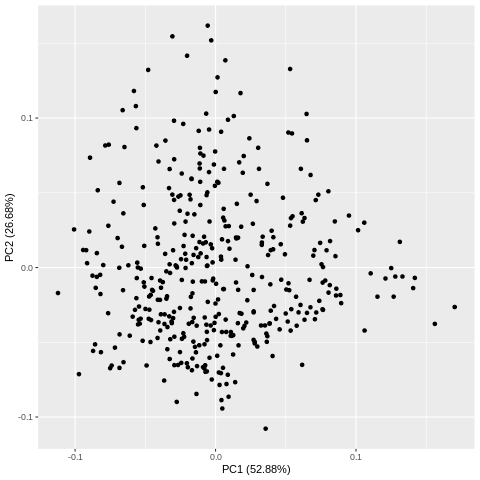

In [8]:
%%R
library(ggfortify)

autoplot(tpca)

### Additional features

In [9]:
%%R 
tmp = as.data.table(tableRes)
tmp[,old:=ifelse(Age < 61, 'Younger', 'Older')]
fig <- autoplot(tpca, data = tmp, colour = 'old',loadings = TRUE, loadings.colour = 'blue',
         loadings.label = TRUE, loadings.label.size = 5) +
    theme_bw()

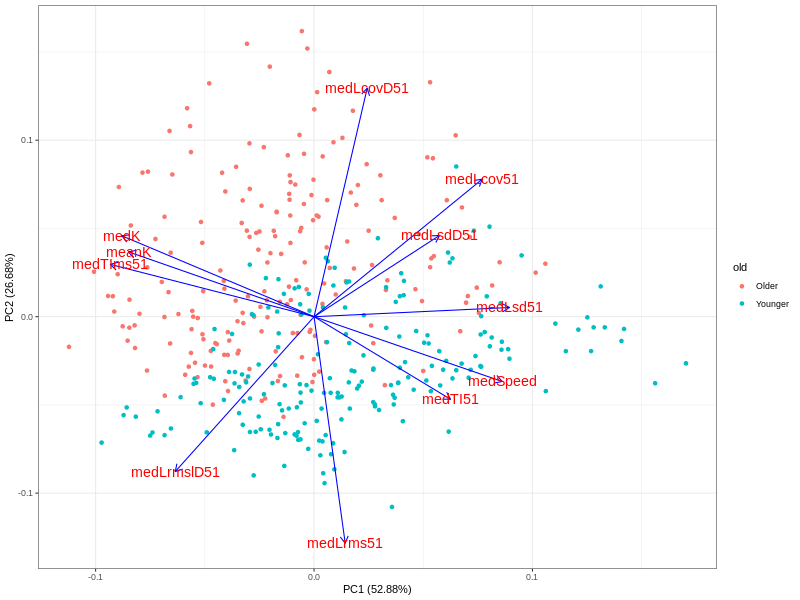

In [10]:
%%R -w 800 -h 600 -u px
fig

### The step by step way

In [11]:
%%R  

balancePcaPlot <- tmp[,.(iSubj,trial,Age,Decade,old)]
balancePcaPlot[,PCA1:=tpca$x[,1]]
balancePcaPlot[,PCA2:=tpca$x[,2]]

     iSubj trial Age Decade     old       PCA1       PCA2
  1:     1     1  76      7   Older -0.3940074  0.7063803
  2:     1     2  76      7   Older -0.4690613 -0.3174284
  3:     1     3  76      7   Older  3.3567930  0.2727497
  4:     1     4  76      7   Older  3.5928590  0.5645955
  5:     1     5  76      7   Older  2.5631942  0.9606240
 ---                                                     
396:    40     6  58      5 Younger -3.1612037 -2.1700856
397:    40     7  58      5 Younger -4.6910554 -2.4443562
398:    40     8  58      5 Younger -3.9356359 -1.9407878
399:    40     9  58      5 Younger -3.3001137 -2.3003477
400:    40    10  58      5 Younger -2.3693058 -2.2456987


### ggplot2

In [19]:
%%R 
bpp <- ggplot(balancePcaPlot,aes(PCA1,PCA2,group=old))
bpp <- bpp + geom_point(aes(colour=old),size=3,alpha=0.5)+ 
        stat_ellipse(size=0.3)+
        theme_bw()+
    coord_fixed(ratio = 1)

### The result

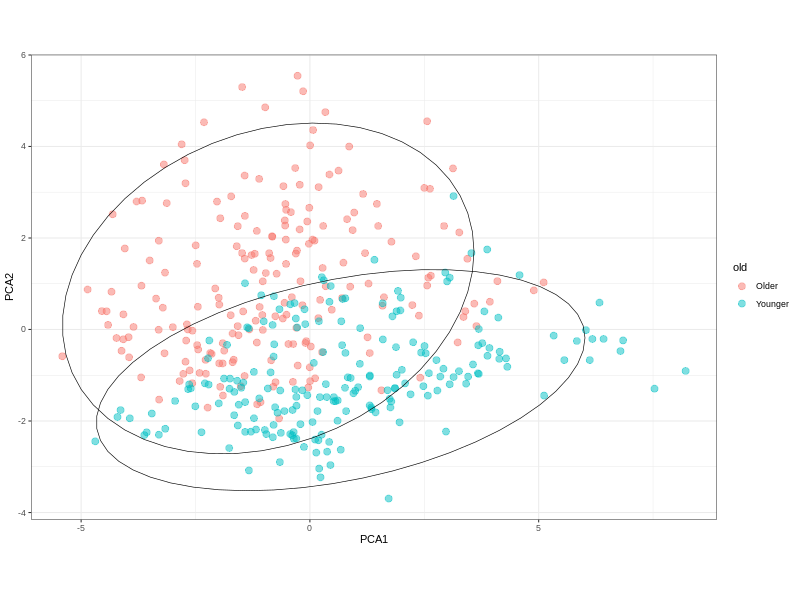

In [20]:
%%R -w 800 -h 600 -u px
bpp    # to add the biplot, look at ./data/figures.R 

### R variables to python

In [13]:
%%R -o balancePcaPlot
balancePcaPlot

     iSubj trial Age Decade     old       PCA1       PCA2
  1:     1     1  76      7   Older -0.3940074  0.7063803
  2:     1     2  76      7   Older -0.4690613 -0.3174284
  3:     1     3  76      7   Older  3.3567930  0.2727497
  4:     1     4  76      7   Older  3.5928590  0.5645955
  5:     1     5  76      7   Older  2.5631942  0.9606240
 ---                                                     
396:    40     6  58      5 Younger -3.1612037 -2.1700856
397:    40     7  58      5 Younger -4.6910554 -2.4443562
398:    40     8  58      5 Younger -3.9356359 -1.9407878
399:    40     9  58      5 Younger -3.3001137 -2.3003477
400:    40    10  58      5 Younger -2.3693058 -2.2456987


### Now you can use `balancePcaPlot` in python

In [14]:
balancePcaPlot

,iSubj,trial,Age,Decade,old,PCA1,PCA2
1,1,1,76,7,Older,-0.394007,0.706380
2,1,2,76,7,Older,-0.469061,-0.317428
3,1,3,76,7,Older,3.356793,0.272750
4,1,4,76,7,Older,3.592859,0.564595
5,1,5,76,7,Older,2.563194,0.960624
...,...,...,...,...,...,...,...
396,40,6,58,5,Younger,-3.161204,-2.170086
397,40,7,58,5,Younger,-4.691055,-2.444356
398,40,8,58,5,Younger,-3.935636,-1.940788
399,40,9,58,5,Younger,-3.300114,-2.300348


In [15]:
import plotly.graph_objects as go

In [21]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=balancePcaPlot['PCA1'],
                         y=balancePcaPlot['PCA2'],
                         marker = dict(size=balancePcaPlot['Decade']*2),
                         mode='markers'))

# End of PCA projections

[Plotly cheat sheet](https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf)